In [2]:
import pandas as pd

In [3]:
import os
from PIL import Image

# Directory containing your images
image_dir = './documents'  # Current directory

# List all files in the directory
image_files = os.listdir(image_dir)

# Open each image file
images = [Image.open(os.path.join(image_dir, file)) for file in image_files if file.endswith(('.png', '.jpg', '.jpeg'))]

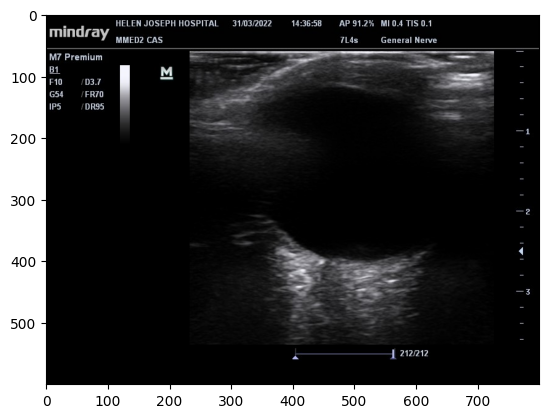

In [4]:
import matplotlib.pyplot as plt

# Display the first image
plt.imshow(images[0])
plt.show()

In [5]:
import pandas as pd
import os

# Load the DataFrame from the Excel file
excel_file = './Meta_pic.xlsx'
df = pd.read_excel(excel_file)

# Convert necessary columns to strings and create a label column following the naming convention
df['label'] = df['record_id'].astype(str) + '_image_data_' + df['redcap_repeat_instance'].astype(str) + '_raw_image.jpg'

# Now let's proceed to match and rename the images
documents_dir = './documents'  # Assuming this is your correct directory path

# Iterate over the DataFrame to match, rename images and create an ONSD mapping dictionary
image_onsd_mapping = {}
for index, row in df.iterrows():
    image_name_to_look_for = row['label']
    onsd_value = row['onsd']
    image_path = os.path.join(documents_dir, image_name_to_look_for)

    if os.path.exists(image_path):
        image_onsd_mapping[image_name_to_look_for] = onsd_value
    else:
        print(f"No matching file found for label: {image_name_to_look_for}")

# Display the ONSD mapping
for image_name, onsd_value in image_onsd_mapping.items():
    print(f"{image_name}: {onsd_value}")


MMED-002_image_data_1_raw_image.jpg: 5
MMED-002_image_data_2_raw_image.jpg: 5
MMED-003_image_data_1_raw_image.jpg: 5
MMED-004_image_data_1_raw_image.jpg: 5
MMED-004_image_data_2_raw_image.jpg: 5
MMED-005_image_data_1_raw_image.jpg: 5
MMED-005_image_data_2_raw_image.jpg: 4
MMED-006_image_data_1_raw_image.jpg: 5
MMED-006_image_data_2_raw_image.jpg: 5
MMED-007_image_data_1_raw_image.jpg: 4
MMED-007_image_data_2_raw_image.jpg: 5
MMED-008_image_data_1_raw_image.jpg: 5
MMED-008_image_data_2_raw_image.jpg: 5
MMED-009_image_data_1_raw_image.jpg: 4
MMED-010_image_data_1_raw_image.jpg: 5
MMED-010_image_data_2_raw_image.jpg: 6
MMED-011_image_data_1_raw_image.jpg: 4
MMED-011_image_data_2_raw_image.jpg: 4
MMED-012_image_data_1_raw_image.jpg: 4
MMED-012_image_data_2_raw_image.jpg: 4
MMED-013_image_data_1_raw_image.jpg: 4
MMED-013_image_data_2_raw_image.jpg: 5
MMED-014_image_data_1_raw_image.jpg: 5
MMED-014_image_data_2_raw_image.jpg: 5
MMED-015_image_data_1_raw_image.jpg: 5
MMED-015_image_data_2_raw

In [6]:
import pandas as pd

# Convert your dictionary to a DataFrame
df_onsd = pd.DataFrame(list(image_onsd_mapping.items()), columns=['filename', 'label'])

# Save this DataFrame to a CSV file
df_onsd.to_csv('image_labels.csv', index=False)


In [7]:
from PIL import Image, ImageEnhance
import os

# Define the coordinates of the crop box (left, upper, right, lower)
crop_box = (300, 300, 650, 525)

# Path to the directory containing the images
image_dir = './documents'  # Replace with the path to your image directory

# New directory to store processed images
processed_dir = os.path.join(image_dir, 'processed_images')
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# List of all image filenames
image_filenames = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for image_filename in image_filenames:
    image_path = os.path.join(image_dir, image_filename)
    with Image.open(image_path) as img:
        # Crop the image
        cropped_img = img.crop(crop_box)
        # Enhance the contrast
        enhancer = ImageEnhance.Contrast(cropped_img)
        enhanced_img = enhancer.enhance(10)  # Contrast factor of 10
        # Save the processed image in the 'processed_images' directory
        enhanced_img.save(os.path.join(processed_dir, f"enhanced_{image_filename}"))

print(f"Processed images are saved in {processed_dir}")




Processed images are saved in ./documents\processed_images


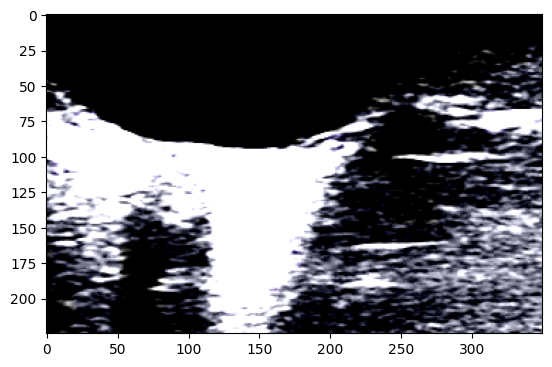

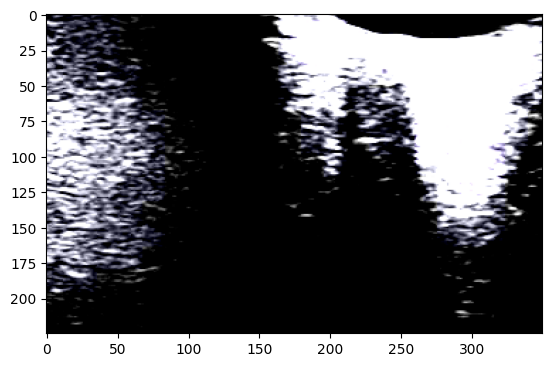

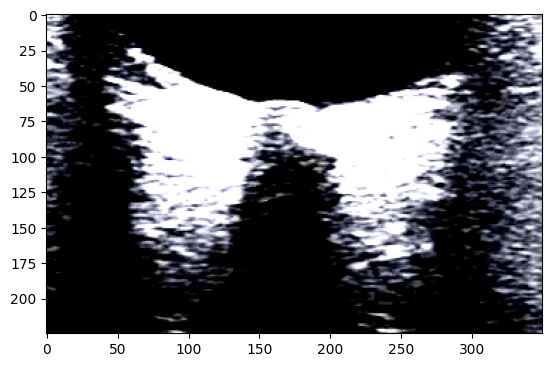

In [8]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Function to calculate crop coordinates and enhance contrast
def process_image(image_path, contrast_factor=1.5):
    with Image.open(image_path) as img:
        # Crop the image
        crop_box = (300, 300, 650, 525)
        cropped_img = img.crop(crop_box)
        # Enhance the contrast
        enhancer = ImageEnhance.Contrast(cropped_img)
        enhanced_img = enhancer.enhance(contrast_factor)
        return enhanced_img

# List your image paths here
image_paths = [
    'documents/MMED-009_image_data_1_raw_image.jpg',
    'documents/MMED-012_image_data_2_raw_image.jpg',
    'documents/MMED-017_image_data_2_raw_image.jpg'
]

# Adjust the contrast factor as needed
contrast_factor = 10

# This will iterate over the first three image paths, process them, and display them inline
for path in image_paths[:3]:
    processed_image = process_image(path, contrast_factor)
    plt.figure()
    plt.imshow(processed_image)
    plt.show()



In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Instantiate the ImageDataGenerator without augmentation, just rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Load the image filenames and the labels from the CSV file
df_onsd = pd.read_csv('image_labels.csv')

# Create the generator to include your images and labels
train_generator = datagen.flow_from_dataframe(
    dataframe=df_onsd,
    directory='./documents',  # Make sure this is the path to your images
    x_col='filename',
    y_col='label',
    class_mode='raw',  # Use 'raw' because you have continuous labels, not categorical
    target_size=(256, 256),  # Resize the images if necessary
    batch_size=32
)

# Now, train_generator can be used in model.fit to train your CNN


Found 205 validated image filenames.


In [10]:
import pandas as pd
import os

# Load the DataFrame from the Excel file
excel_file = './Meta_pic.xlsx'
df = pd.read_excel(excel_file)

# Convert necessary columns to strings and create a label column following the naming convention
df['processed_label'] = 'enhanced_' + df['record_id'].astype(str) + '_image_data_' + df['redcap_repeat_instance'].astype(str) + '_raw_image.jpg'

# Define the directory containing your processed images
processed_images_dir = './documents/processed_images'  

# Create a new DataFrame to store image names and corresponding ONSD measurements
image_measurements = []

# Iterate over the DataFrame to find matches in the processed_images directory
for index, row in df.iterrows():
    processed_image_name = row['processed_label']
    onsd_value = row['onsd']
    image_path = os.path.join(processed_images_dir, processed_image_name)

    if os.path.exists(image_path):
        # If a matching processed image is found, append the details to the list
        image_measurements.append({'image_filename': processed_image_name, 'onsd_measurement': onsd_value})
    else:
        print(f"No matching file found for label: {processed_image_name}")

# Convert the list to a DataFrame
image_measurements_df = pd.DataFrame(image_measurements)

# Save this DataFrame to a CSV file in the processed_images directory
csv_file_path = os.path.join(processed_images_dir, 'image_measurements.csv')
image_measurements_df.to_csv(csv_file_path, index=False)

print(f"CSV file saved to {csv_file_path}")


CSV file saved to ./documents/processed_images\image_measurements.csv


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image


In [12]:
import pandas as pd
import os
from PIL import Image
import numpy as np

# Correct base directory for your processed images
base_dir = r"C:\Users\cparker\OneDrive - WRHI\Andrew\FilesReport_UJReport_2024-03-14_1413 (1)\FilesReport_UJReport_2024-03-14_1413\documents\processed_images"

# Assuming you have 'image_measurements.csv' in the same directory as your processed images
csv_file = os.path.join(base_dir, 'image_measurements.csv')
df = pd.read_csv(csv_file)

# Function to load images based on the corrected path
def load_images(df, base_dir):
    images = []
    for _, row in df.iterrows():
        image_path = os.path.join(base_dir, row['image_filename'])
        try:
            with Image.open(image_path) as img:
                img = img.resize((128, 128))  # Resize for uniformity
                img_array = np.array(img)
                images.append(img_array)
        except FileNotFoundError:
            print(f"File not found: {image_path}")
    return np.array(images)

images = load_images(df, base_dir)
onsd_measurements = df['onsd_measurement'].values

# Normalize images
images = images / 255.0

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(images, onsd_measurements, test_size=0.2, random_state=42)


In [13]:
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1)  # Single output node for regression
    ])
    return model


In [14]:
model = build_model()
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])  # MSE is a common loss for regression


c:\Users\cparker\AppData\Local\anaconda3\envs\new_env_name\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))


Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 631ms/step - loss: 17.8008 - mae: 3.9402 - val_loss: 5.7087 - val_mae: 2.2886
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - loss: 4.2493 - mae: 1.7860 - val_loss: 0.6367 - val_mae: 0.6608
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - loss: 2.0724 - mae: 1.1994 - val_loss: 1.1586 - val_mae: 0.9027
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - loss: 1.6511 - mae: 1.0445 - val_loss: 0.6119 - val_mae: 0.6406
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - loss: 1.6994 - mae: 0.9814 - val_loss: 1.0092 - val_mae: 0.8340
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - loss: 1.4235 - mae: 0.9479 - val_loss: 0.6385 - val_mae: 0.6342
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - loss: 1.4699 - mae: 0.9523 - val_loss: 0.7368 - val_mae: 0.7348
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step - loss: 1.4249 - mae: 0.9596 - val_loss: 0.8621 - val_mae: 0.6974
Epoch 9/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - loss: 1.3390 - mae:

In [16]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.5247 - mae: 0.5513 
Test MAE: 0.5573388934135437


In [17]:
# Make predictions
predictions = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step


In [18]:
for i in range(len(predictions)):
    print(f"Predicted: {predictions[i][0]}, Actual: {y_test[i]}")


Predicted: 5.509201526641846, Actual: 6
Predicted: 4.950369358062744, Actual: 4
Predicted: 4.598480224609375, Actual: 4
Predicted: 5.127840995788574, Actual: 5
Predicted: 4.554250717163086, Actual: 4
Predicted: 5.015409469604492, Actual: 4
Predicted: 5.160411357879639, Actual: 4
Predicted: 4.448666095733643, Actual: 5
Predicted: 5.411334991455078, Actual: 4
Predicted: 5.5121989250183105, Actual: 5
Predicted: 4.925268173217773, Actual: 5
Predicted: 4.428554058074951, Actual: 5
Predicted: 5.030488967895508, Actual: 5
Predicted: 5.290010452270508, Actual: 5
Predicted: 4.8042826652526855, Actual: 4
Predicted: 5.140778541564941, Actual: 5
Predicted: 5.562814712524414, Actual: 4
Predicted: 4.634626388549805, Actual: 5
Predicted: 4.9864912033081055, Actual: 5
Predicted: 5.085328102111816, Actual: 5
Predicted: 5.236563682556152, Actual: 5
Predicted: 4.9609880447387695, Actual: 5
Predicted: 5.088315010070801, Actual: 5
Predicted: 4.802580833435059, Actual: 4
Predicted: 4.628182411193848, Actual

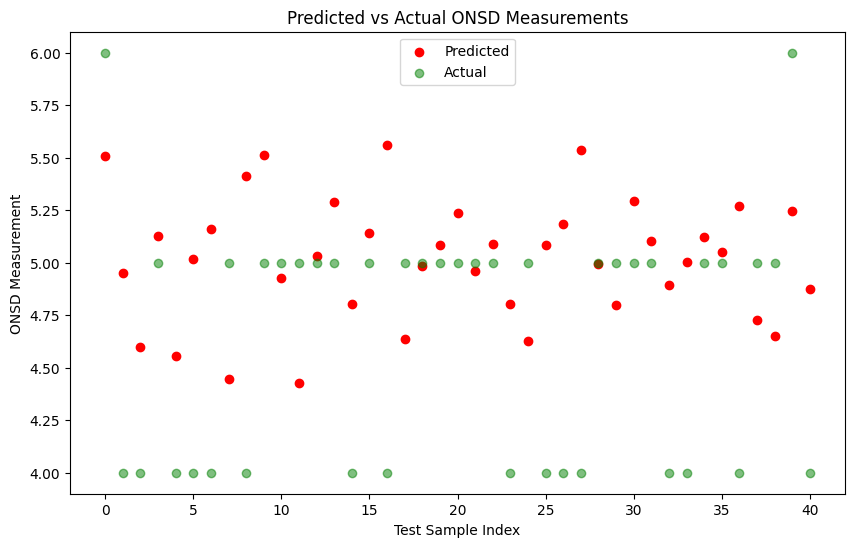

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(predictions)), predictions, color='r', label='Predicted')
plt.scatter(range(len(y_test)), y_test, color='g', alpha=0.5, label='Actual')
plt.title('Predicted vs Actual ONSD Measurements')
plt.xlabel('Test Sample Index')
plt.ylabel('ONSD Measurement')
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.5573388425315299
Root Mean Square Error (RMSE): 0.7211625922086764


[[6.         5.50920153]
 [4.         4.95036936]
 [4.         4.59848022]
 [5.         5.127841  ]
 [4.         4.55425072]
 [4.         5.01540947]
 [4.         5.16041136]
 [5.         4.4486661 ]
 [4.         5.41133499]
 [5.         5.51219893]]


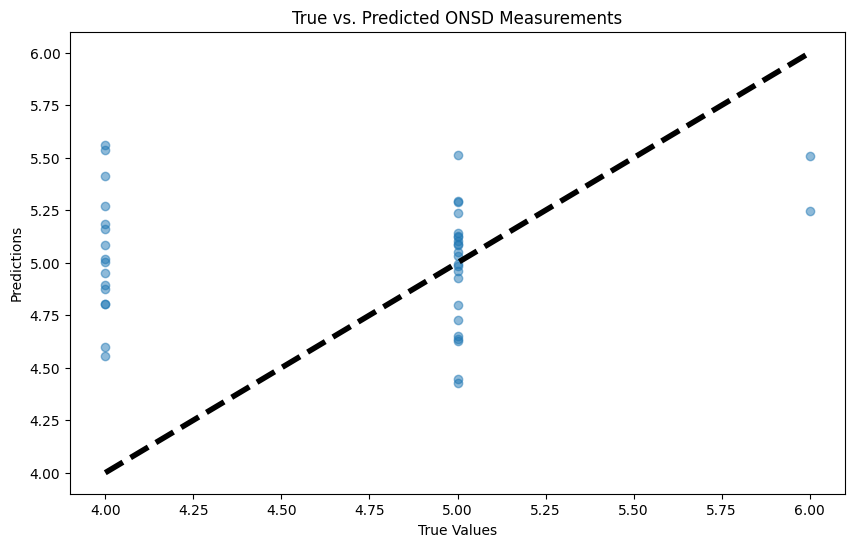

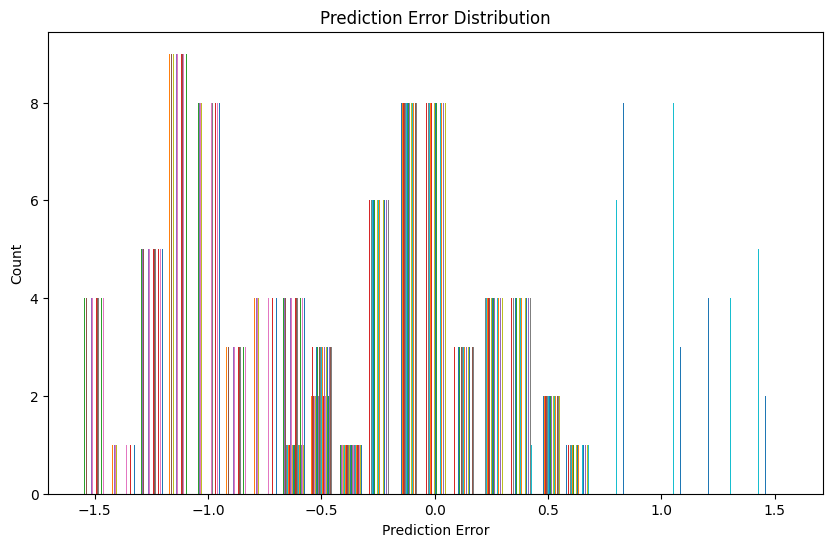

In [21]:
import matplotlib.pyplot as plt

# Assuming 'predictions' is a numpy array of your model's predicted ONSD measurements
# and 'y_test' is the true ONSD measurements

# Compare predictions with actual values
comparison = np.column_stack((y_test, predictions))

# Print the first few comparisons to check
print(comparison[:10])

# Plotting the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line for reference
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted ONSD Measurements')
plt.show()

# Plotting the error distribution
errors = y_test - predictions
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Prediction Error Distribution')
plt.show()


In [22]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def build_enhanced_model(input_shape=(128, 128, 3)):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1))  # Output layer for regression

    return model


In [23]:
model = build_enhanced_model()
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Now you would train your model, perhaps with more epochs or different batch sizes
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))


c:\Users\cparker\AppData\Local\anaconda3\envs\new_env_name\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - loss: 25.2924 - mae: 4.5931 - val_loss: 22.1659 - val_mae: 4.6411
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 840ms/step - loss: 25.5978 - mae: 4.7623 - val_loss: 15.2637 - val_mae: 3.7827
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 842ms/step - loss: 22.0468 - mae: 4.5244 - val_loss: 5.4769 - val_mae: 1.9708
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 797ms/step - loss: 21.0221 - mae: 4.4347 - val_loss: 3.0879 - val_mae: 1.6365
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 784ms/step - loss: 21.0327 - mae: 4.3945 - val_loss: 31.9407 - val_mae: 5.7971
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 753ms/step - loss: 19.9811 - mae: 4.2688 - val_loss: 112.0228 - val_mae: 10.8084
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 758ms/step - loss: 19.6435 - mae: 4.1863 - val_loss: 241.3350 - val_mae: 15.7869
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 749ms/step - loss: 18.5301 - mae: 4.0769 - val_loss: 415.4905 - val_mae: 20.6596
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 897ms/step - lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 708ms/step
Mean Absolute Error (MAE): 203.50194009920446
Mean Squared Error (MSE): 43423.48425763079
Root Mean Squared Error (RMSE): 208.38302295923916


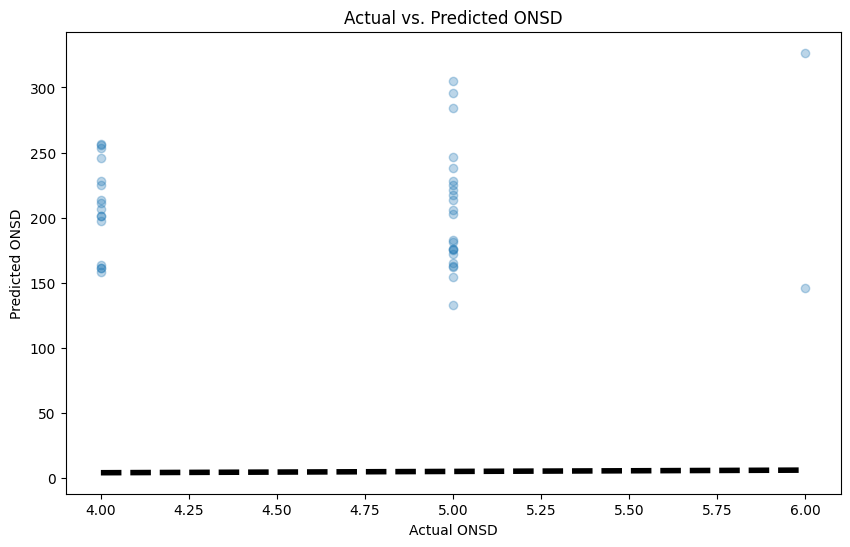

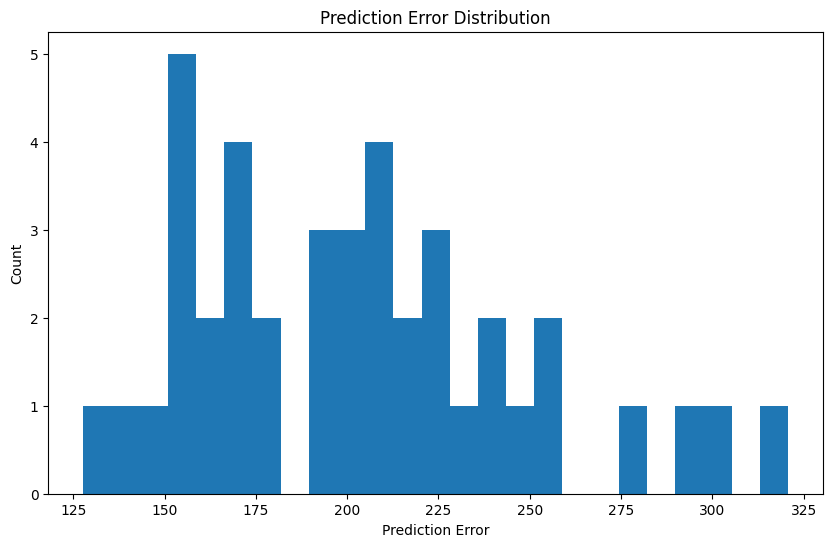

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'X_test' and 'y_test' are your test datasets

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # RMSE is just the square root of MSE

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual ONSD')
plt.ylabel('Predicted ONSD')
plt.title('Actual vs. Predicted ONSD')
plt.show()

# Plotting the error distribution
errors = predictions.flatten() - y_test
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Prediction Error Distribution')
plt.show()


In [25]:
# Assuming 'predictions' is a numpy array with the predicted ONSD values
# And 'y_test' is the actual ONSD measurements from the test set

# Convert predictions to a 1D array if it's not already
predictions = predictions.flatten()

# Create a DataFrame for a cleaner display
comparison_df = pd.DataFrame({'Actual ONSD': y_test, 'Predicted ONSD': predictions})

# Add a column for absolute error
comparison_df['Absolute Error'] = np.abs(comparison_df['Actual ONSD'] - comparison_df['Predicted ONSD'])

# Display several examples
print(comparison_df.head(10))


   Actual ONSD  Predicted ONSD  Absolute Error
0            6      326.664978      320.664978
1            4      201.038666      197.038666
2            4      160.923233      156.923233
3            5      246.337524      241.337524
4            4      253.505630      249.505630
5            4      201.170654      197.170654
6            4      255.673569      251.673569
7            5      172.300919      167.300919
8            4      211.126495      207.126495
9            5      296.094543      291.094543


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Add early stopping to halt training when validation loss increases
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model with early stopping
history = model.fit(
    X_train, y_train, 
    batch_size=32, 
    epochs=50, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 2.5722 - mae: 1.1909 - val_loss: 43996.5664 - val_mae: 213.5028
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 1.9319 - mae: 1.1056 - val_loss: 44072.7852 - val_mae: 213.6337
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 2.4968 - mae: 1.2134 - val_loss: 43063.7812 - val_mae: 210.9900
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 2.3643 - mae: 1.1919 - val_loss: 43013.3359 - val_mae: 210.6445
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 964ms/step - loss: 2.2886 - mae: 1.1750 - val_loss: 43492.3984 - val_mae: 211.7509
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 2.5649 - mae: 1.2505 - val_loss: 45652.6719 - val_mae: 217.0446
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 2.7814 - mae: 1.2533 - val_loss: 46628.3281 - val_mae: 219.3460
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 975ms/step - loss: 2.3019 - mae: 1.2566 - val_loss: 46328.2734 - val_mae: 218.4946
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 94